<h2>Creating Model ML for Translation_office Client per Day </h2>

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pylab import rcParams
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale,LabelEncoder

import seaborn as sb
sb.set_style('whitegrid')
from collections import Counter

In [37]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4

In [39]:
translations= pd.read_csv('Translation_Totals.csv',sep=';')
translations.head()

,date,day,month,year,total_day,client_number
0,2022-01-31,Monday,1,2022,12500,4
1,2022-01-23,Sunday,1,2022,19200,7
2,2022-01-13,Thursday,1,2022,14000,5
3,2022-01-04,Tuesday,1,2022,17800,6
4,2022-01-27,Thursday,1,2022,24200,7


In [57]:
translations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           107 non-null    object
 1   day            107 non-null    int64 
 2   month          107 non-null    int64 
 3   year           107 non-null    int64 
 4   total_day      107 non-null    int64 
 5   client_number  107 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 5.1+ KB


In [40]:
print(translations.corr())

                  month      year  total_day  client_number
month          1.000000 -0.989023   0.070744       0.162570
year          -0.989023  1.000000  -0.072833      -0.162121
total_day      0.070744 -0.072833   1.000000       0.733805
client_number  0.162570 -0.162121   0.733805       1.000000


<h4>We have a probleme hear days are categorical variable we could't applyin a scale, for that we are going to do some one hot encoding( transformin day_column to a numirical variables the result should be 1-> 7 of course we have 7 days in the week) </h4>


In [46]:
encoder= LabelEncoder()
translations['day']=encoder.fit_transform(translations[['day']])

In [47]:
translations['day']

0      0
1      2
2      3
3      4
4      3
      ..
102    1
103    5
104    1
105    5
106    4
Name: day, Length: 107, dtype: int64

<h4>Seting up the variables "X" and the target "y" </h4>


In [51]:
translations_data = translations[['day','month','year']].values

translations_target = translations[['client_number']]

translations_data_names = ['day','month','year']

X, y =scale(translations_data), translations_target

<h4> cheking for the missing values </h4>


In [52]:
missing_values = X==np.NAN
X[missing_values == True]

array([], dtype=float64)

<h4>Fitting the Mode</h4>


In [55]:
MyModel=LinearRegression(normalize=True)

MyModel.fit(X,y)

print(MyModel.score(X,y))

0.029416491975365


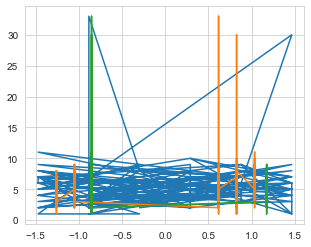

In [56]:
plt.plot(X,y)